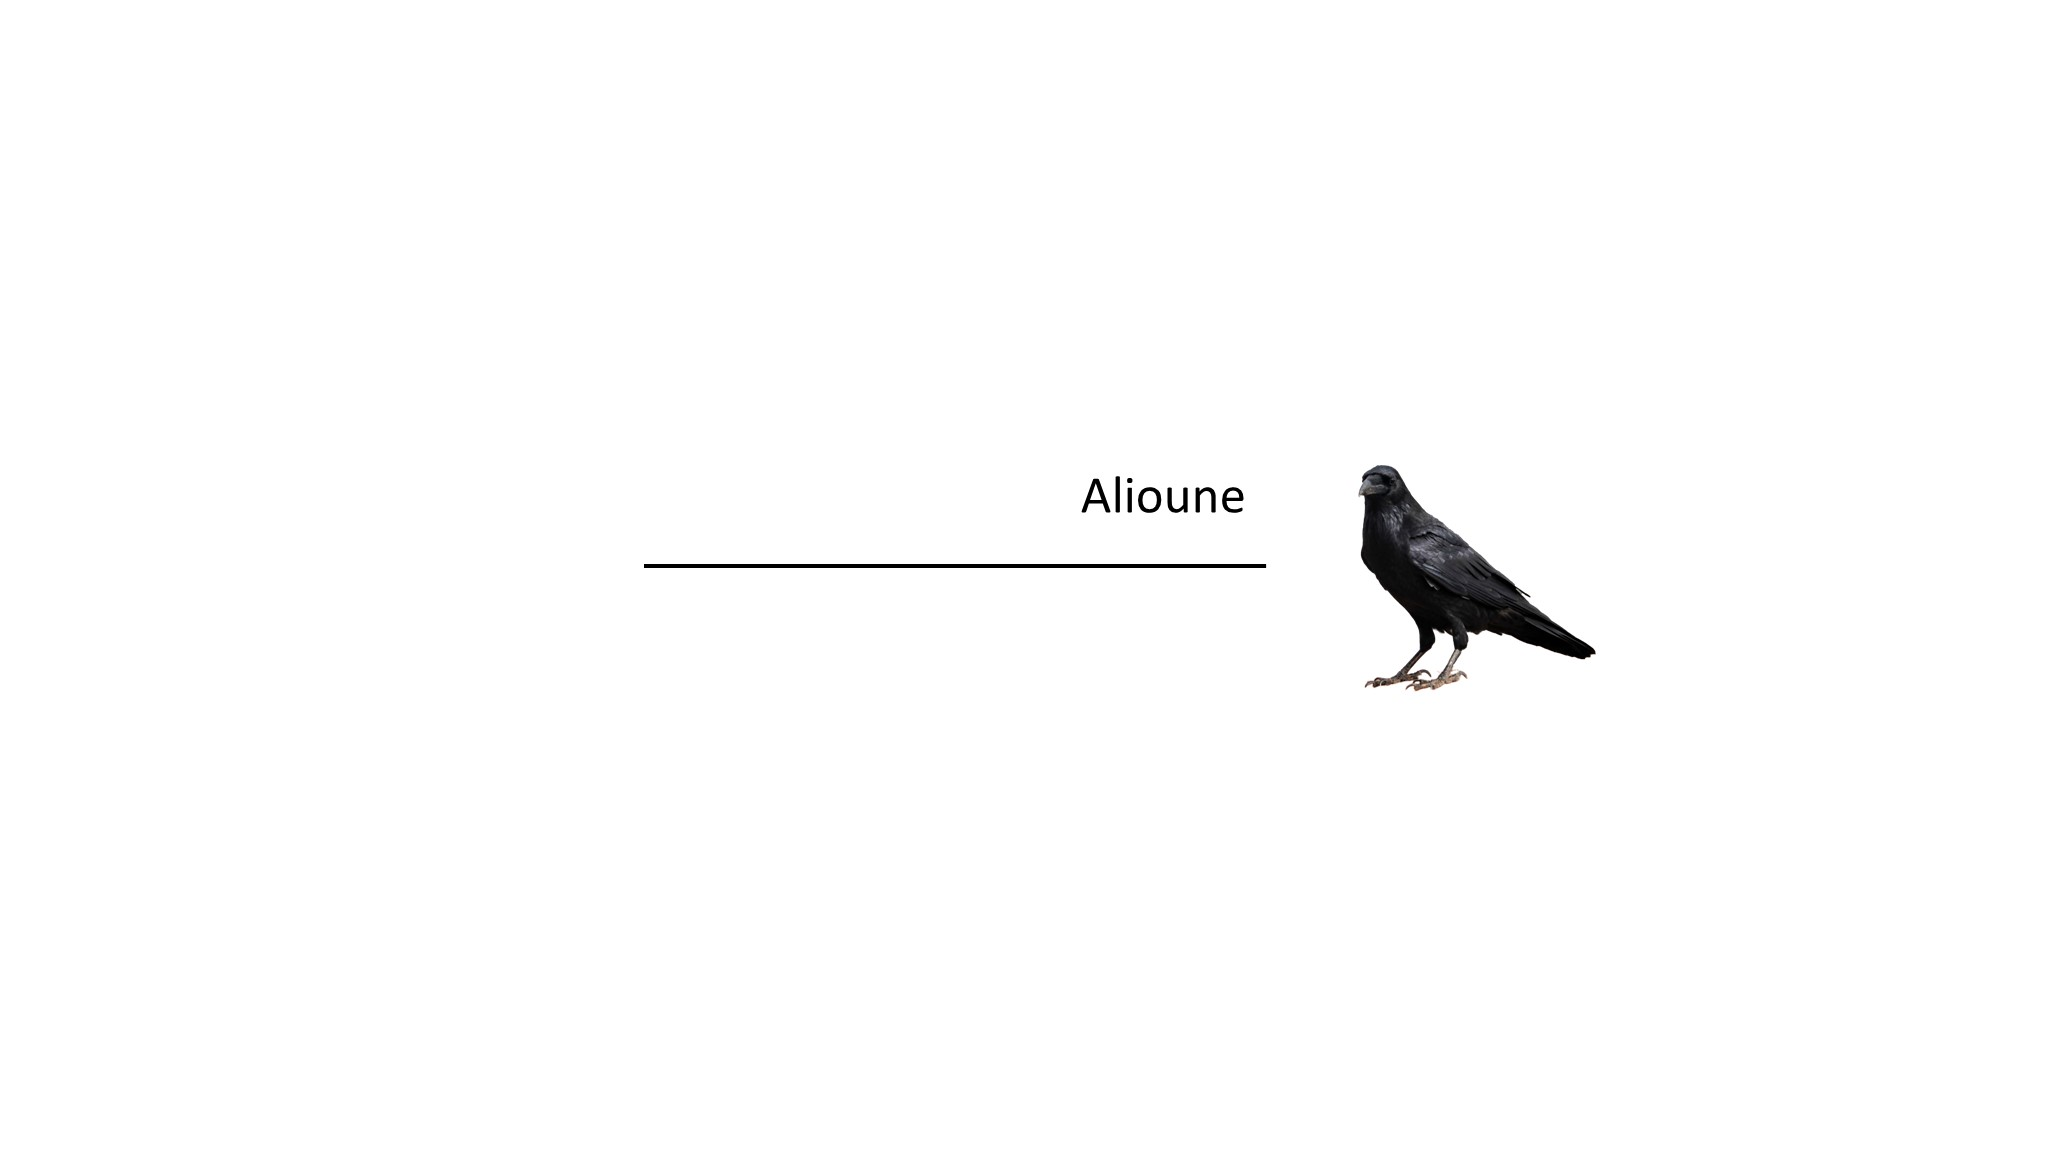

# Purpose of Notebook: Prediction (Notebook 4 of 4)
# <u>[Data Science Nigeria Challenge #1: Loan Default Prediction](https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction/data)</u>

In this notebook, I processed the ML algorithm for classification of the feature `good_bad_flag`.

<u>Prerequisites</u>:
* Install [PyCaret](https://pycaret.readthedocs.io/en/latest/installation.html)

<u>Credits</u>: [blue7red](https://www.kaggle.com/rhythmcam) [[PyCaret fix_imbalance]Deal with Unbalanced Data](https://www.kaggle.com/code/rhythmcam/pycaret-fix-imbalance-deal-with-unbalanced-data)]

### 1. Load libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from imblearn.combine import *

### 2. Load data

In [2]:
df = pd.read_csv('clean_no_spatial.csv')
df.head()

,loanamount,totaldue,termdays,referred,good_bad_flag,age_as_at_2017,bank_account_type,bank_name_clients,employment_status_clients,loanamount_trainprevloans,totaldue_trainprevloans,termdays_trainprevloans,closeddate_days,firstduedate_days,firstrepaiddate_days
0,30000.0,34500.0,30,Yes,Good,45,Other,Diamond Bank,Permanent,10000.0,13000.0,30,17,30,17
1,20000.0,22250.0,15,Yes,Good,33,Other,EcoBank,Permanent,10000.0,11500.0,15,15,15,15
2,10000.0,11500.0,15,Yes,Good,40,Savings,First Bank,Permanent,10000.0,11500.0,15,27,16,27
3,40000.0,44000.0,30,Yes,Good,31,Other,GT Bank,Permanent,20000.0,23800.0,30,29,30,29
4,10000.0,13000.0,30,Yes,Good,28,Savings,GT Bank,Permanent,10000.0,13000.0,30,27,30,27


In [3]:
df.shape

(3261, 15)

### 3. Create relavent dummies

In [4]:
# Dummie referred
df_referred = pd.get_dummies(df['referred'])
df = df.join(df_referred).drop('referred', axis=1)

# Dummie bank_account_type
df_bank_account_type = pd.get_dummies(df['bank_account_type'])
df = df.join(df_bank_account_type).drop('bank_account_type', axis=1)

# Dummie bank_name_clients
df_bank_name_clients= pd.get_dummies(df['bank_name_clients'])
df = df.join(df_bank_name_clients).drop('bank_name_clients', axis=1)

# Dummie employment_status_clients
df_employment_status_clients = pd.get_dummies(df['employment_status_clients'])
df = df.join(df_employment_status_clients).drop('employment_status_clients', axis=1)

df.head()

,loanamount,totaldue,termdays,good_bad_flag,age_as_at_2017,loanamount_trainprevloans,totaldue_trainprevloans,termdays_trainprevloans,closeddate_days,firstduedate_days,firstrepaiddate_days,Yes,Current,Other,Savings,Access Bank,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,Heritage Bank,Keystone Bank,Skye Bank,Stanbic IBTC,Standard Chartered,Sterling Bank,UBA,Union Bank,Unity Bank,Wema Bank,Zenith Bank,Contract,Permanent,Retired,Self-Employed,Student,Undisclosed,Unemployed
0,30000.0,34500.0,30,Good,45,10000.0,13000.0,30,17,30,17,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,20000.0,22250.0,15,Good,33,10000.0,11500.0,15,15,15,15,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,10000.0,11500.0,15,Good,40,10000.0,11500.0,15,27,16,27,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,40000.0,44000.0,30,Good,31,20000.0,23800.0,30,29,30,29,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,10000.0,13000.0,30,Good,28,10000.0,13000.0,30,27,30,27,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### 4. Balancing data

#### 4.1. Setup appropriate variables

In [5]:
TARGET = "good_bad_flag"
SEED = 2021
VAL_SET_SIZE = 0.25

MODEL_NAME = "lightgbm"

def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])

In [6]:
getLabelCount(df,TARGET)

[('Bad', 709), ('Good', 2552)]

#### 4.2. Split Train and Test data

In [7]:
X = df.drop([TARGET],axis = 1)
y = df[TARGET]

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=VAL_SET_SIZE,random_state=SEED)

#### 4.3. Balance data

In [9]:
smote = SMOTETomek(random_state=SEED)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [10]:
pd.Series(y_train_over).value_counts()

Good    1825
Bad     1825
Name: good_bad_flag, dtype: int64

In [11]:
df = X_train_over
df[TARGET] = y_train_over

In [12]:
getLabelCount(df,TARGET)

[('Bad', 1825), ('Good', 1825)]

### 5. Setup PyCaret

In [13]:
clf1 = setup(data = df, 
             silent=True,
             target = TARGET, 
             fix_imbalance = True,
             fix_imbalance_method=smote,
             session_id=SEED
            )

,Description,Value
0,session_id,2021
1,Target,good_bad_flag
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(3650, 40)"
5,Missing Values,False
6,Numeric Features,39
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### 6. Find top model

In [14]:
top_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8520,0.9152,0.8969,0.8242,0.8586,0.7040,0.7075,0.2670
catboost,CatBoost Classifier,0.8509,0.9123,0.9242,0.8069,0.8613,0.7016,0.7099,1.3630
ada,Ada Boost Classifier,0.8457,0.8919,0.9266,0.7984,0.8576,0.6914,0.7007,0.1450
rf,Random Forest Classifier,0.8450,0.9164,0.8734,0.8281,0.8498,0.6899,0.6917,0.2530
et,Extra Trees Classifier,0.8422,0.9039,0.8773,0.8208,0.8479,0.6844,0.6866,0.2100
lightgbm,Light Gradient Boosting Machine,0.8422,0.9142,0.8828,0.8178,0.8487,0.6844,0.6874,0.0940
ridge,Ridge Classifier,0.8410,0.0000,0.9938,0.7619,0.8625,0.6818,0.7162,0.0680
lda,Linear Discriminant Analysis,0.8410,0.8949,0.9969,0.7607,0.8628,0.6818,0.7178,0.0760
gbc,Gradient Boosting Classifier,0.8399,0.8904,0.9078,0.8003,0.8504,0.6797,0.6866,0.2070
dt,Decision Tree Classifier,0.7898,0.7923,0.7695,0.8034,0.7858,0.5796,0.5806,0.0680


### 7. Use top model
Top model happens to be the <u>Extreme Gradient Boosting</u>

In [15]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8672,0.9222,0.9219,0.8310,0.8741,0.7344,0.7388
1,0.8359,0.8970,0.8359,0.8359,0.8359,0.6719,0.6719
2,0.8242,0.8772,0.9062,0.7785,0.8375,0.6484,0.6573
3,0.8516,0.9111,0.9141,0.8125,0.8603,0.7031,0.7087
4,0.8824,0.9458,0.9062,0.8657,0.8855,0.7647,0.7655
5,0.8745,0.9364,0.9375,0.8333,0.8824,0.7489,0.7549
6,0.8667,0.9299,0.9219,0.8310,0.8741,0.7332,0.7377
7,0.8275,0.8987,0.8750,0.8000,0.8358,0.6548,0.6577
8,0.8353,0.9029,0.8750,0.8116,0.8421,0.6705,0.6726


### 8. Prune top model

In [16]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8438,0.9220,0.9531,0.7821,0.8592,0.6875,0.7046
1,0.8438,0.9031,0.9219,0.7973,0.8551,0.6875,0.6960
2,0.8086,0.8857,0.9219,0.7516,0.8281,0.6172,0.6337
3,0.8398,0.8984,0.9297,0.7881,0.8530,0.6797,0.6909
4,0.8784,0.9415,0.9297,0.8440,0.8848,0.7568,0.7607
5,0.8706,0.9401,0.9766,0.8065,0.8834,0.7410,0.7582
6,0.8314,0.9042,0.9062,0.7891,0.8436,0.6625,0.6700
7,0.8431,0.9002,0.8906,0.8143,0.8507,0.6862,0.6892
8,0.8510,0.9067,0.9141,0.8125,0.8603,0.7018,0.7074


### 9. Model validation

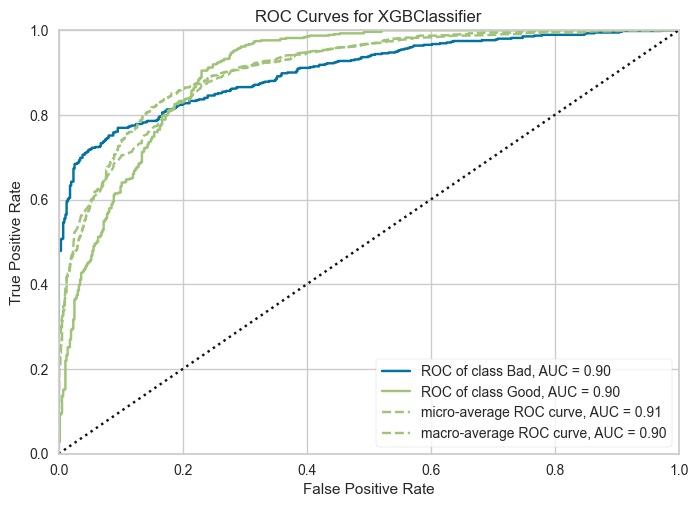

In [17]:
plot_model(tuned_xgboost)

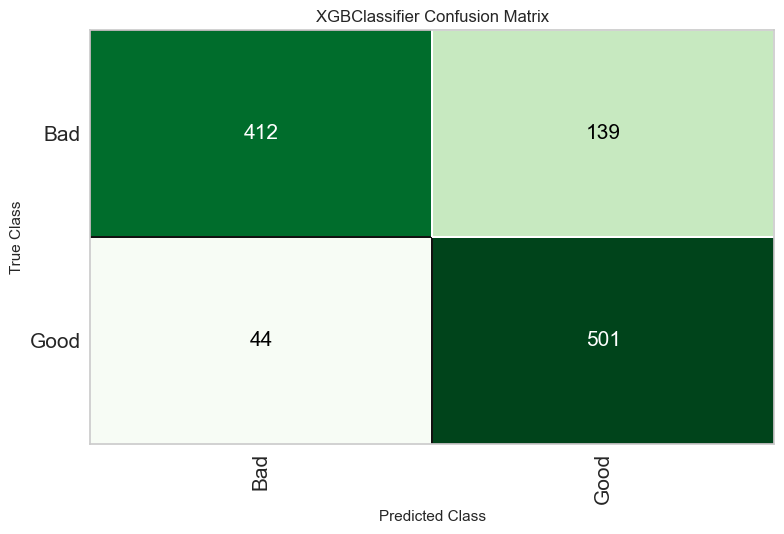

In [18]:
plot_model(tuned_xgboost, plot='confusion_matrix')

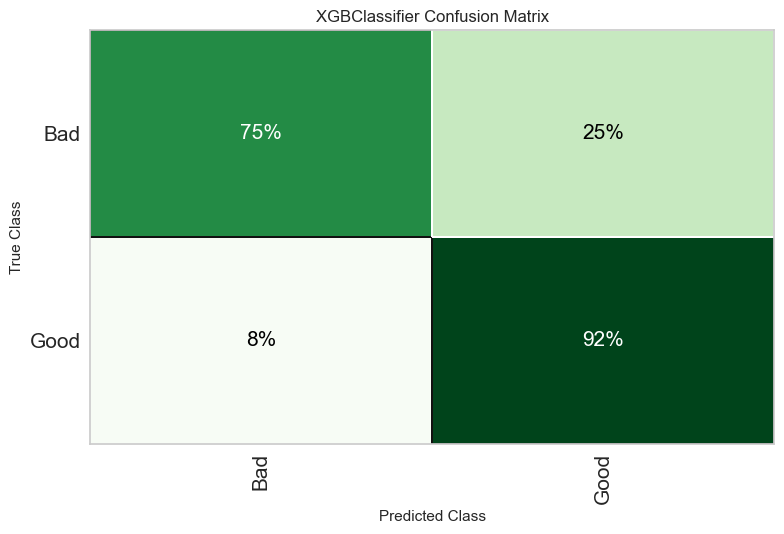

In [19]:
plot_model(tuned_xgboost, plot='confusion_matrix', plot_kwargs = {'percent' : True})

### 10. Prediction on test data

In [20]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8330,0.9038,0.9193,0.7828,0.8456,0.6664,0.6766


,loanamount,totaldue,termdays,age_as_at_2017,loanamount_trainprevloans,totaldue_trainprevloans,termdays_trainprevloans,closeddate_days,firstduedate_days,firstrepaiddate_days,...,Contract,Permanent,Retired,Self-Employed,Student,Undisclosed,Unemployed,good_bad_flag,Label,Score
0,10000.0,11125.0,15.0,48.0,10000.0,11500.000000,15.0,12.0,15.0,12.0,...,0,1,0,0,0,0,0,Good,Good,0.8304
1,10000.0,13000.0,30.0,30.0,10000.0,11500.000000,15.0,25.0,16.0,25.0,...,0,1,0,0,0,0,0,Good,Good,0.6490
2,30000.0,39000.0,60.0,35.0,10000.0,13000.000000,30.0,27.0,30.0,27.0,...,0,0,0,1,0,0,0,Good,Good,0.9812
3,20000.0,24500.0,30.0,37.0,20000.0,23857.191406,30.0,30.0,30.0,30.0,...,0,0,0,0,0,0,0,Bad,Bad,0.9331
4,10000.0,13000.0,30.0,24.0,10000.0,13000.000000,30.0,27.0,31.0,27.0,...,0,1,0,0,0,0,0,Good,Good,0.8437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,10000.0,13000.0,30.0,37.0,10000.0,13000.000000,30.0,30.0,30.0,30.0,...,0,1,0,0,0,0,0,Bad,Bad,0.8104
1092,20000.0,24500.0,30.0,36.0,20000.0,23800.000000,30.0,31.0,31.0,31.0,...,0,0,0,0,0,0,0,Bad,Bad,0.9977
1093,10000.0,11500.0,15.0,33.0,10000.0,13000.000000,30.0,30.0,33.0,30.0,...,0,0,0,0,0,1,0,Good,Good,0.7730
1094,20000.0,24500.0,30.0,55.0,10000.0,13000.000000,30.0,13.0,32.0,13.0,...,0,1,0,0,0,0,0,Good,Good,0.9170
